## Entrainement d'un arbre de décision pour la prédiction
1. Uilisation de la classe DecisinTreeRegressor
2. Dataset est housing.csv sur les prix median des districts de l'état de la Californie, USA. 20640 Observations.


In [7]:
#Chargement des données: housing.csv
import pandas as pd # importation du module pandas
import numpy as np
habitation = pd.read_csv("housing.csv") 

In [8]:
habitation.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
habitation.shape

(20640, 10)

In [10]:
#séparation du data en jeu d'entrainement et de test.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(habitation, test_size=0.2, 
                                       random_state=42)

In [11]:
train_set.shape

(16512, 10)

In [12]:
test_set.shape

(4128, 10)

In [13]:
habitation = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

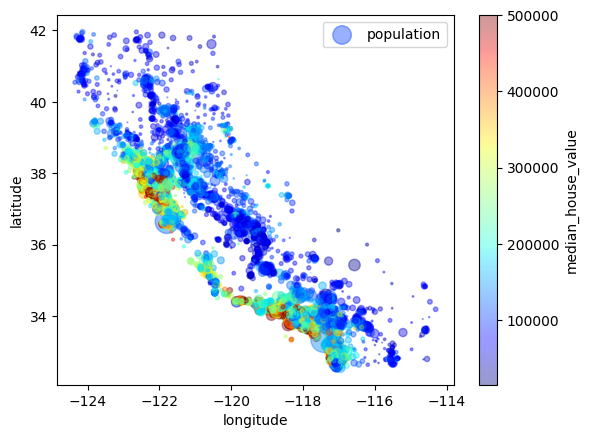

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
habitation.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                s=habitation['population']/100, label="population",
               c="median_house_value", cmap=plt.get_cmap("jet"), 
                colorbar=True)

In [15]:
#séparation du dataset en la matrice (dataframe) des données et le vecteur de sortie (label)
#c'est important d'inqidquer la colonne de sortie à prédire.
habitation = train_set.drop("median_house_value", axis=1)
habitation_labels = train_set["median_house_value"].copy()

In [16]:
#création d'un dataframe juste pour les données numériques afin de réaliser les opérations dédiées

habitation_num = habitation.drop("ocean_proximity", axis=1)

In [17]:
#création d'un pipeline pour les opérations sur les variables numériques

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    ])


In [18]:
#création d'un full pieline pour traiter l'ensembles des varaibles
#noter qu'on fait appel (réutilisation) au pipeline pour les variables numériques

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(habitation_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [19]:
#Application du pipeline pour avoir un data bien préparée.
habitation_preparee= full_pipeline.fit_transform(habitation)

# Selection d'un modele 
type arbre de décision basé sur la regression. Utilisation de  la classe DecisionTreeregressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() #erreur quadratique par défaut.
tree_reg.fit(habitation_preparee, habitation_labels)

DecisionTreeRegressor()

In [21]:
#test du modele appris (tree_re) sur le jeu de test : test_set non nettoyé 
#en appliquant le pipeiine. D'ou l'intérêt du pipieline !

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_preparee = full_pipeline.transform(X_test)
y_pred = tree_reg.predict(X_test_preparee)

In [22]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

69669.77668387462


In [23]:
some_data = habitation.iloc[:5]
some_labels = habitation_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prédiction:", tree_reg.predict(some_data_prepared))
print("true value:", list(some_labels))

Prédiction: [103000. 382100. 172600.  93400.  96500.]
true value: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]
